# ပီတာနှင့်ဝက်ခြံ: Reinforcement Learning အခြေခံသင်ခန်းစာ

ဒီသင်ခန်းစာမှာ၊ path finding ပြဿနာကို ဖြေရှင်းဖို့ Reinforcement learning ကို ဘယ်လိုအသုံးပြုရမယ်ဆိုတာကို လေ့လာပါမယ်။ ဒီအခြေအနေကို ရုရှားတေးရေးဆရာ [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev) ရဲ့ [Peter and the Wolf](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) ဆိုတဲ့ ဂီတပုံပြင်ကနေ အားယူထားပါတယ်။ ဒီပုံပြင်ကတော့ အိမ်ကနေတောထဲကို ဝက်ခြံကိုလိုက်ဖမ်းဖို့ ရဲရင့်စွာထွက်လာတဲ့ လူငယ်ပီတာအကြောင်းဖြစ်ပါတယ်။ ပီတာကို ပတ်ဝန်းကျင်ကို စူးစမ်းဖို့နဲ့ အကောင်းဆုံး navigation map တည်ဆောက်ဖို့ ကူညီပေးမယ့် machine learning algorithm တွေကို ကျွန်တော်တို့ သင်ကြားမယ်။

ပထမဆုံး၊ အသုံးဝင်တဲ့ library တွေကို import လုပ်ကြရအောင်:


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## အကျဉ်းချုပ် - Reinforcement Learning

**Reinforcement Learning** (RL) ဆိုသည်မှာ **ပတ်ဝန်းကျင်** တစ်ခုအတွင်း **အေးဂျင့်** တစ်ယောက်၏ အကောင်းဆုံးအပြုအမူကို စမ်းသပ်မှုများစွာပြုလုပ်ခြင်းအားဖြင့် သင်ယူနိုင်စေသော သင်ယူမှုနည်းလမ်းတစ်ရပ်ဖြစ်သည်။ ဒီပတ်ဝန်းကျင်အတွင်းရှိ အေးဂျင့်သည် **reward function** ဖြင့် သတ်မှတ်ထားသော **ရည်မှန်းချက်** တစ်ခုရှိရမည်။

## ပတ်ဝန်းကျင်

ရိုးရှင်းစွာပြောရမည်ဆိုပါက၊ Peter ၏ ကမ္ဘာကို `width` x `height` အရွယ်အစားရှိ စတုရန်းပုံဘုတ်အဖြစ် စဉ်းစားကြည့်ပါ။ ဒီဘုတ်အတွင်းရှိ အခန်းတစ်ခုစီမှာ အောက်ပါအတိုင်းဖြစ်နိုင်ပါသည်-
* **မြေပြင်** - Peter နှင့် အခြားတိရစ္ဆာန်များ လမ်းလျှောက်နိုင်သောနေရာ
* **ရေ** - သင်မလမ်းလျှောက်နိုင်သောနေရာ
* **သစ်ပင်** သို့မဟုတ် **မြက်ခင်း** - အနားယူရန်နေရာ
* **ပန်းသီး** - Peter အတွက် အစားအစာရရှိရန် လိုအပ်သောအရာ
* **ဝက်ဝံ** - အန္တရာယ်ရှိပြီး ရှောင်ရှားရမည့်အရာ

ဒီပတ်ဝန်းကျင်နှင့် အလုပ်လုပ်ရန်အတွက် `Board` ဟုခေါ်သော class တစ်ခုကို သတ်မှတ်မည်ဖြစ်သည်။ ဒီ notebook ကို အလွန်ရှုပ်ထွေးစေမည့်အစား၊ ဘုတ်နှင့်ဆိုင်သော အကုဒ်အားလုံးကို `rlboard` module အတွင်းသို့ သီးခြားထားလိုက်ပါသည်။ ယခုအခါမှာ ကျွန်ုပ်တို့သည် အဆိုပါ module ကို import ပြုလုပ်မည်ဖြစ်သည်။ အကောင်အထည်ဖော်မှု၏ အတွင်းပိုင်းအသေးစိတ်ကို သိလိုပါက ဒီ module အတွင်းကို ကြည့်ရှုနိုင်ပါသည်။


In [2]:
from rlboard import *

အခု random board တစ်ခု ဖန်တီးပြီး ဒါကို ဘယ်လိုပုံစံရှိလဲဆိုတာ ကြည့်ကြရအောင်:


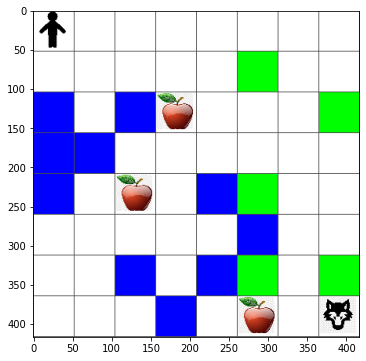

In [3]:
width, height = 8,8
m = Board(width,height)
m.randomize(seed=13)
m.plot()

## လုပ်ဆောင်ချက်များနှင့် မူဝါဒ

ဤဥပမာတွင် Peter ၏ရည်မှန်းချက်မှာ ပန်းသီးတစ်လုံးကို ရှာဖွေဖို့ဖြစ်ပြီး၊ ဝံပုလွေနှင့် အခြားအတားအဆီးများကို ရှောင်ရှားရန်ဖြစ်သည်။ ဒါကိုလုပ်ဆောင်ရန်၊ သူသည် အချိန်မရွေး လိုအပ်သလို လမ်းလျှောက်ပြီး ပန်းသီးကို ရှာတွေ့နိုင်သည်။ ထို့ကြောင့်၊ မည်သည့်နေရာတွင်မဆို သူသည် အောက်ပါလုပ်ဆောင်ချက်များထဲမှ တစ်ခုကို ရွေးချယ်နိုင်သည် - အပေါ်၊ အောက်၊ ဘယ်နှင့် ညာ။ ဤလုပ်ဆောင်ချက်များကို dictionary အနေနဲ့ သတ်မှတ်ပြီး၊ ဆက်စပ်နေရာပြောင်းလဲမှုများနှင့် တွဲဖက်သတ်မှတ်ပါမည်။ ဥပမာအားဖြင့်, ညာဘက်သို့ ရွှေ့ခြင်း (`R`) သည် `(1,0)` အတွဲနှင့် ကိုက်ညီသည်။


In [4]:
actions = { "U" : (0,-1), "D" : (0,1), "L" : (-1,0), "R" : (1,0) }
action_idx = { a : i for i,a in enumerate(actions.keys()) }

ကျွန်ုပ်တို့၏ ကိုယ်စားလှယ် (Peter) ၏ မဟာဗျူဟာကို **မူဝါဒ** ဟုခေါ်သော အရာတစ်ခုဖြင့် သတ်မှတ်ထားသည်။ အလွယ်တစ်ကူဆုံး မူဝါဒတစ်ခုဖြစ်သည့် **ကျပန်းလမ်းလျှောက်မှု** ကို စဉ်းစားကြည့်ပါစို့။

## ကျပန်းလမ်းလျှောက်မှု

ပထမဦးစွာ ကျပန်းလမ်းလျှောက်မှု မဟာဗျူဟာကို အကောင်အထည်ဖော်ခြင်းဖြင့် ကျွန်ုပ်တို့၏ ပြဿနာကို ဖြေရှင်းကြည့်ပါစို့။


In [5]:
def random_policy(m):
    return random.choice(list(actions))

def walk(m,policy,start_position=None):
    n = 0 # number of steps
    # set initial position
    if start_position:
        m.human = start_position 
    else:
        m.random_start()
    while True:
        if m.at() == Board.Cell.apple:
            return n # success!
        if m.at() in [Board.Cell.wolf, Board.Cell.water]:
            return -1 # eaten by wolf or drowned
        while True:
            a = actions[policy(m)]
            new_pos = m.move_pos(m.human,a)
            if m.is_valid(new_pos) and m.at(new_pos)!=Board.Cell.water:
                m.move(a) # do the actual move
                break
        n+=1

walk(m,random_policy)

18

အမှတ်မရှိလမ်းလျှောက်စမ်းသပ်မှုကိုအကြိမ်ကြိမ်ပြုလုပ်ပြီး၊ လုပ်ဆောင်ခဲ့သည့်အဆင့်အရေအတွက်ပျမ်းမျှကိုကြည့်ကြစို့:


In [6]:
def print_statistics(policy):
    s,w,n = 0,0,0
    for _ in range(100):
        z = walk(m,policy)
        if z<0:
            w+=1
        else:
            s += z
            n += 1
    print(f"Average path length = {s/n}, eaten by wolf: {w} times")

print_statistics(random_policy)

Average path length = 32.87096774193548, eaten by wolf: 7 times


## အကျိုးခံစားခွင့်အလုပ်ဆောင်မှု

ကျွန်တော်တို့ရဲ့မူဝါဒကို ပိုမိုထက်မြက်စေဖို့၊ ဘယ်လှုပ်ရှားမှုတွေက "ပိုကောင်း" တယ်ဆိုတာကို နားလည်ဖို့လိုပါတယ်။


In [7]:
move_reward = -0.1
goal_reward = 10
end_reward = -10

def reward(m,pos=None):
    pos = pos or m.human
    if not m.is_valid(pos):
        return end_reward
    x = m.at(pos)
    if x==Board.Cell.water or x == Board.Cell.wolf:
        return end_reward
    if x==Board.Cell.apple:
        return goal_reward
    return move_reward

## Q-Learning

Q-Table သို့မဟုတ် multi-dimensional array တစ်ခုကို တည်ဆောက်ပါ။ ကျွန်ုပ်တို့၏ board သည် `width` x `height` အတိုင်းအတာရှိသောကြောင့် Q-Table ကို `width` x `height` x `len(actions)` အရွယ်အစားရှိသော numpy array ဖြင့် ကိုယ်စားပြုနိုင်ပါသည်။


In [8]:
Q = np.ones((width,height,len(actions)),dtype=np.float)*1.0/len(actions)

Q-Table ကို ပုံဖော်မှုလုပ်ဆောင်ရန် plot function သို့ ပေးပို့ပါ။


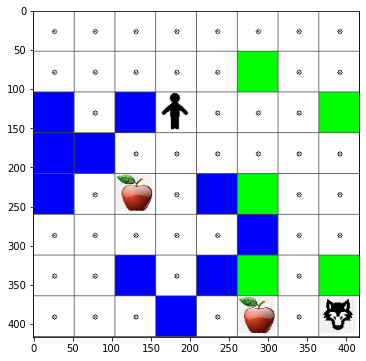

In [9]:
m.plot(Q)

## Q-Learning အဓိပ္ပါယ်: Bellman Equation နှင့် သင်ကြားမှု အယ်လဂိုရီသမ်

ကျွန်ုပ်တို့၏ သင်ကြားမှု အယ်လဂိုရီသမ်အတွက် pseudo-code ရေးပါ:

* Q-Table Q ကို အခြေအနေများနှင့် လုပ်ဆောင်မှုများအားလုံးအတွက် တန်းတူသော နံပါတ်များဖြင့် စတင်သတ်မှတ်ပါ  
* သင်ကြားမှုနှုန်း $\alpha\leftarrow 1$ အဖြစ် သတ်မှတ်ပါ  
* စမ်းသပ်မှုကို မကြာမီအကြိမ်များ ပြုလုပ်ပါ  
   1. ဆွဲချန်ထားသော တည်နေရာမှ စတင်ပါ  
   1. ထပ်မံလုပ်ဆောင်ပါ  
        1. အခြေအနေ $s$ တွင် လုပ်ဆောင်မှု $a$ ကို ရွေးချယ်ပါ  
        2. လုပ်ဆောင်မှုကို အကောင်အထည်ဖော်ပြီး အခြေအနေအသစ် $s'$ သို့ ရောက်ရှိပါ  
        3. အကစားပွဲအဆုံးအခြေအနေကို တွေ့ရှိပါက၊ သို့မဟုတ် စုစုပေါင်းဆုလာဘ်သည် အလွန်နည်းပါက - စမ်းသပ်မှုမှ ထွက်ပါ  
        4. အခြေအနေအသစ်တွင် ဆုလာဘ် $r$ ကို တွက်ချက်ပါ  
        5. Bellman equation အတိုင်း Q-Function ကို ပြင်ဆင်ပါ: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$  
        6. $s\leftarrow s'$  
        7. စုစုပေါင်းဆုလာဘ်ကို ပြင်ဆင်ပြီး $\alpha$ ကို လျော့ပါ။  

## ရှာဖွေမှုနှင့် အကျိုးခံစားမှု

အကောင်းဆုံးနည်းလမ်းမှာ ရှာဖွေမှုနှင့် အကျိုးခံစားမှုကို မျှတစွာ ချိန်ညှိခြင်းဖြစ်သည်။ ကျွန်ုပ်တို့၏ ပတ်ဝန်းကျင်အကြောင်း ပိုမိုလေ့လာသိရှိလာသည့်အခါ၊ အကောင်းဆုံးလမ်းကြောင်းကို လိုက်နာရန် ပိုမိုဖြစ်နိုင်သော်လည်း၊ မကြိုးစားရသေးသော လမ်းကြောင်းကို တစ်ခါတစ်ရံ ရွေးချယ်ပါ။

## Python ဖြင့် အကောင်အထည်ဖော်ခြင်း

ယခု ကျွန်ုပ်တို့ သင်ကြားမှု အယ်လဂိုရီသမ်ကို အကောင်အထည်ဖော်ရန် ပြင်ဆင်ပြီးဖြစ်သည်။ ထိုအရာမတိုင်မီ၊ Q-Table အတွင်းရှိ မည်သည့် နံပါတ်မဆိုကို လိုက်လျောညီထွေသော လုပ်ဆောင်မှုများအတွက် အလားအလာများဖြင့် ဗက်တာအဖြစ် ပြောင်းလဲပေးမည့် function တစ်ခုလည်း လိုအပ်ပါသည်:  


In [10]:
def probs(v,eps=1e-4):
    v = v-v.min()+eps
    v = v/v.sum()
    return v

မူရင်းဗက်တာတွင် ပါဝင်သော အစိတ်အပိုင်းအားလုံး တူညီနေသော အခြေအနေတွင် 0 ဖြင့်စားခြင်းကို ရှောင်ရှားရန်အတွက် `eps` အနည်းငယ်ကို မူရင်းဗက်တာတွင် ထည့်သွင်းပါသည်။

အမှန်တကယ် သင်ယူမှု အယ်လဂိုရစ်သမ်ကို **epochs** ဟုခေါ်သော 5000 ကြိမ် စမ်းသပ်မှုများအတွက် အကောင်အထည်ဖော်မည်:


In [11]:

from IPython.display import clear_output

lpath = []

for epoch in range(10000):
    clear_output(wait=True)
    print(f"Epoch = {epoch}",end='')

    # Pick initial point
    m.random_start()
    
    # Start travelling
    n=0
    cum_reward = 0
    while True:
        x,y = m.human
        v = probs(Q[x,y])
        a = random.choices(list(actions),weights=v)[0]
        dpos = actions[a]
        m.move(dpos,check_correctness=False) # we allow player to move outside the board, which terminates episode
        r = reward(m)
        cum_reward += r
        if r==end_reward or cum_reward < -1000:
            print(f" {n} steps",end='\r')
            lpath.append(n)
            break
        alpha = np.exp(-n / 3000)
        gamma = 0.5
        ai = action_idx[a]
        Q[x,y,ai] = (1 - alpha) * Q[x,y,ai] + alpha * (r + gamma * Q[x+dpos[0], y+dpos[1]].max())
        n+=1

ဒီအယ်လဂိုရီသင်္ချာကို အကောင်အထည်ဖော်ပြီးနောက်၊ Q-Table ကို အဆင့်တိုင်းတွင် အခြားအရေးယူမှုများ၏ ဆွဲဆောင်မှုကို သတ်မှတ်သော တန်ဖိုးများဖြင့် အပ်ဒိတ်လုပ်ထားသင့်သည်။ အဆိုပါဇယားကို ဒီမှာ မြင်နိုင်ပါသည်။


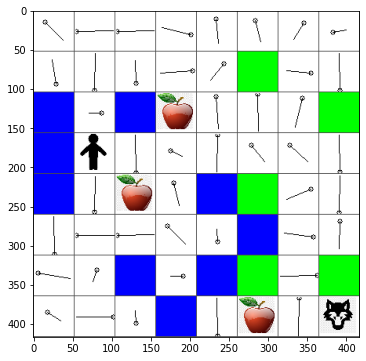

In [12]:
m.plot(Q)

## မူဝါဒကို စစ်ဆေးခြင်း

Q-Table သည် အခြေအနေတစ်ခုစီတွင် လုပ်ဆောင်မှုတစ်ခုစီ၏ "ဆွဲဆောင်မှု" ကို ဖော်ပြထားသောကြောင့် ကျွန်ုပ်တို့၏ကမ္ဘာတွင် ထိရောက်သော လမ်းကြောင်းရှာဖွေမှုကို သတ်မှတ်ရန် အသုံးပြုရန် အလွန်လွယ်ကူသည်။ အလွယ်ဆုံးအခြေအနေတွင် Q-Table အတန်ဖိုးအမြင့်ဆုံးနှင့် ကိုက်ညီသော လုပ်ဆောင်မှုကို ရွေးချယ်နိုင်သည်။


In [13]:
def qpolicy_strict(m):
        x,y = m.human
        v = probs(Q[x,y])
        a = list(actions)[np.argmax(v)]
        return a

walk(m,qpolicy_strict)

2

အကယ်၍ အပေါ်ရှိ ကုဒ်ကို အကြိမ်ကြိမ် စမ်းကြည့်ပါက တစ်ခါတစ်ရံ "တိတ်ဆိတ်" သွားပြီး notebook ထဲမှာ STOP ခလုတ်ကို နှိပ်ပြီး ရပ်တန့်ရန် လိုအပ်တတ်သည်။

> **Task 1:** `walk` function ကို ပြင်ဆင်ပြီး လမ်းကြောင်း၏ အရှည်ကို အတိအကျ အဆင့် ၁၀၀ အထိ ကန့်သတ်ရန် ပြုလုပ်ပါ၊ ထို့နောက် အပေါ်ရှိ ကုဒ်သည် အချို့အခါ၌ ဤတန်ဖိုးကို ပြန်လည်ထုတ်ပေးမည်ကို ကြည့်ရှုပါ။

> **Task 2:** `walk` function ကို ပြင်ဆင်ပြီး ယခင်က ရောက်ရှိခဲ့သောနေရာများသို့ ပြန်မသွားရန် ပြုလုပ်ပါ။ ဤအရာသည် `walk` ကို looping မဖြစ်စေရန် ကာကွယ်ပေးမည်ဖြစ်သော်လည်း၊ agent သည် ထွက်မရနိုင်သောနေရာတွင် "ပိတ်မိ" သွားနိုင်ခြင်းကို မကာကွယ်နိုင်ပါ။


In [14]:

def qpolicy(m):
        x,y = m.human
        v = probs(Q[x,y])
        a = random.choices(list(actions),weights=v)[0]
        return a

print_statistics(qpolicy)

Average path length = 3.45, eaten by wolf: 0 times


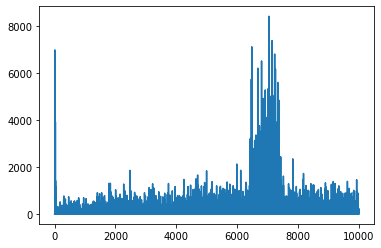

In [15]:
plt.plot(lpath)

အရင်ဆုံးမှာ အလတ်စားလမ်းရှည်တိုးလာတာကို တွေ့ရပါတယ်။ ဒါဟာ ပတ်ဝန်းကျင်အကြောင်း ဘာမှ မသိတဲ့အချိန်မှာ - ဆိုးရွားတဲ့အခြေအနေတွေ၊ ရေ၊ သို့မဟုတ် ဝက်ဝံတွေထဲမှာ ပိတ်မိလွယ်တဲ့အကြောင်းကြောင့် ဖြစ်နိုင်ပါတယ်။ ပတ်ဝန်းကျင်အကြောင်း ပိုမိုသိလာပြီး ဒီအသိကို အသုံးချတတ်လာတဲ့အခါမှာ ပတ်ဝန်းကျင်ကို ပိုကြာကြာ စူးစမ်းနိုင်ပေမယ့် ပန်းသီးတွေ ရှိတဲ့နေရာကို မသိသေးပါဘူး။

အတော်လေး သင်ယူပြီးရင် အေးဂျင့်အနေနဲ့ ရည်မှန်းချက်ကို ရောက်ရှိဖို့ ပိုလွယ်လာပြီး လမ်းရှည်က တိုလာတယ်။ သို့သော် စူးစမ်းမှုအတွက် အခွင့်အရေးကို မပိတ်ထားသေးလို့ အကောင်းဆုံးလမ်းကြောင်းကနေ ခွဲထွက်ပြီး အခြားရွေးချယ်မှုအသစ်တွေကို စူးစမ်းလေ့ရှိပြီး လမ်းရှည်က အကောင်းဆုံးထက် ပိုကြာလာတတ်ပါတယ်။

ဒီဂရပ်မှာလည်း တွေ့ရတာက တစ်ချိန်ချိန်မှာ လမ်းရှည်က ရုတ်တရက် တိုးလာတာပါ။ ဒါဟာ အစီအစဉ်ရဲ့ စတိုချက်ဆန်တဲ့ လက္ခဏာကို ဖော်ပြပြီး Q-Table ကော်ဖီရှင်တွေကို တန်ဖိုးအသစ်တွေနဲ့ ပြန်ရေးသားရာမှာ "ပျက်စီး" ဖြစ်နိုင်တယ်ဆိုတာကို ဖော်ပြပါတယ်။ ဒီအရာကို သင်ယူနှုန်းကို လျော့ချခြင်း (ဥပမာ - သင်ယူမှုအဆုံးပိုင်းမှာ Q-Table တန်ဖိုးတွေကို အနည်းငယ်သာ ပြင်ဆင်ခြင်း) ဖြင့် အနည်းဆုံးဖြစ်အောင် လုပ်သင့်ပါတယ်။

စုစုပေါင်းအားဖြင့် သင်ယူမှုလုပ်ငန်းစဉ်ရဲ့ အောင်မြင်မှုနဲ့ အရည်အသွေးဟာ သင်ယူနှုန်း၊ သင်ယူနှုန်းလျော့ချမှုနှုန်းနဲ့ လျော့ချမှုအချိုးလိုအပ်ချက်လိုမျိုးသော ပါရာမီတာတွေမှာ အလွန်အရေးကြီးပါတယ်။ ဒီလိုပါရာမီတာတွေကို **hyperparameters** လို့ ခေါ်ပြီး သင်ယူမှုအတွင်းမှာ အဆင်ပြေဖို့ **parameters** (ဥပမာ - Q-Table ကော်ဖီရှင်တွေ) တွေကို optimize လုပ်တာနဲ့ ခွဲခြားထားပါတယ်။ အကောင်းဆုံး hyperparameter တန်ဖိုးတွေကို ရှာဖွေတဲ့လုပ်ငန်းစဉ်ကို **hyperparameter optimization** လို့ ခေါ်ပြီး ဒါဟာ သီးသန့်အကြောင်းအရာတစ်ခုအဖြစ် သတ်မှတ်ထားသင့်ပါတယ်။


## လေ့ကျင့်ခန်း
#### ပီတာနဲ့ ဝံပုလွေကမ္ဘာကို ပိုပြီး အမှန်တကယ်ဆန်အောင် ပြုလုပ်ခြင်း

ကျွန်ုပ်တို့ရဲ့ အခြေအနေမှာတော့ ပီတာဟာ မပင်ပန်းဘဲ၊ မဆာဘဲ နေရာတစ်နေရာကနေ နောက်တစ်နေရာကို လှမ်းသွားနိုင်ခဲ့ပါတယ်။ ဒါပေမယ့် အမှန်တကယ်ဆန်တဲ့ ကမ္ဘာမှာတော့ သူဟာ အချိန်အခါတစ်ချို့မှာ ထိုင်ပြီး အနားယူဖို့လိုအပ်သလို၊ သူ့ကိုယ်သူ အစာကျွေးဖို့လည်း လိုအပ်ပါတယ်။ အောက်ပါ စည်းကမ်းများကို အကောင်အထည်ဖော်ပြီး ကျွန်ုပ်တို့ရဲ့ ကမ္ဘာကို ပိုပြီး အမှန်တကယ်ဆန်အောင် ပြုလုပ်ကြပါစို့-

1. တစ်နေရာကနေ နောက်တစ်နေရာကို ရွှေ့လျားသွားတဲ့အခါမှာ ပီတာဟာ **စွမ်းအင်** ဆုံးရှုံးပြီး **ပင်ပန်းမှု** တိုးလာမယ်။
2. ပီတာဟာ ပန်းသီးတွေ စားခြင်းအားဖြင့် စွမ်းအင်ကို ပြန်လည်ရရှိနိုင်မယ်။
3. ပီတာဟာ သစ်ပင်အောက်မှာ ဒါမှမဟုတ် မြက်ခင်းပေါ်မှာ အနားယူခြင်း (ဥပမာ- သစ်ပင်နဲ့ မြက်ခင်းရှိတဲ့ ဘုတ်ပြားနေရာကို လမ်းလျှောက်ဝင်ခြင်း) ဖြင့် ပင်ပန်းမှုကို လျှော့ချနိုင်မယ်။
4. ပီတာဟာ ဝံပုလွေကို ရှာဖွေပြီး သတ်ဖို့ လိုအပ်တယ်။
5. ဝံပုလွေကို သတ်ဖို့အတွက် ပီတာဟာ သတ်မှတ်ထားတဲ့ စွမ်းအင်နဲ့ ပင်ပန်းမှုအဆင့်တွေ ရှိဖို့ လိုအပ်တယ်၊ မဟုတ်ရင် တိုက်ပွဲမှာ ရှုံးနိမ့်သွားမယ်။

အထက်ပါ စည်းကမ်းများအတိုင်း reward function ကို ပြင်ဆင်ပြီး reinforcement learning algorithm ကို အသုံးပြုကာ ဂိမ်းကို အနိုင်ရဖို့အတွက် အကောင်းဆုံး မဟာဗျူဟာကို သင်ယူပါ။ ထို့နောက် random walk နဲ့ သင့် algorithm တို့ကို ဂိမ်းအနိုင်ရမှုနဲ့ ရှုံးနိမ့်မှု အရေအတွက်အရ နှိုင်းယှဉ်ကြည့်ပါ။

> **Note**: ဒီအလုပ်ကို အောင်မြင်အောင်လုပ်ဖို့အတွက် hyperparameters တွေကို အထူးသဖြင့် epochs အရေအတွက်ကို ပြင်ဆင်ဖို့ လိုအပ်နိုင်ပါတယ်။ ဂိမ်းရဲ့ အောင်မြင်မှု (ဝံပုလွေကို တိုက်ခိုက်နိုင်ခြင်း) ဟာ ရှားပါးတဲ့ အဖြစ်အပျက်ဖြစ်တဲ့အတွက် သင့်မှာ လေ့ကျင့်မှုအချိန်ပိုကြာနိုင်ပါတယ်။



---

**ဝက်ဘ်ဆိုက်မှတ်ချက်**:  
ဤစာရွက်စာတမ်းကို AI ဘာသာပြန်ဝန်ဆောင်မှု [Co-op Translator](https://github.com/Azure/co-op-translator) ကို အသုံးပြု၍ ဘာသာပြန်ထားပါသည်။ ကျွန်ုပ်တို့သည် တိကျမှန်ကန်မှုအတွက် ကြိုးစားနေပါသော်လည်း၊ အလိုအလျောက်ဘာသာပြန်မှုများတွင် အမှားများ သို့မဟုတ် မမှန်ကန်မှုများ ပါဝင်နိုင်သည်ကို ကျေးဇူးပြု၍ သတိပြုပါ။ မူရင်းစာရွက်စာတမ်းကို ၎င်း၏ မူလဘာသာစကားဖြင့် အာဏာတည်သောရင်းမြစ်အဖြစ် သတ်မှတ်ရန် လိုအပ်ပါသည်။ အရေးကြီးသော အချက်အလက်များအတွက် လူကောင်းမွန်သော ပရော်ဖက်ရှင်နယ်ဘာသာပြန်ဝန်ဆောင်မှုကို အကြံပြုပါသည်။ ဤဘာသာပြန်မှုကို အသုံးပြုခြင်းမှ ဖြစ်ပေါ်လာသော နားလည်မှုမှားများ သို့မဟုတ် အဓိပ္ပါယ်မှားများအတွက် ကျွန်ုပ်တို့သည် တာဝန်မယူပါ။
